In [71]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import numpy as np
import healpy as hp



import importlib.util as iu
def import_my_module(module_path):
    """
    Import a module from a full path.
    """
    spec = iu.spec_from_file_location("dynamic_module", module_path)
    module = iu.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module
anod = import_my_module('/home/shiur/local/analysis-tools/classtools/users/rshi/anomalies.py')
ano = import_my_module('/home/shiur/local/large_scale_anomaly/lsa.py')


# Load special CMB

In [7]:
# This version has the pixwin applied
special_cmb = np.load('/home/shiur/local/large_scale_anomaly/data/special_cmb.npy')[0]

In [8]:
special_cmb.shape

(3, 49152)

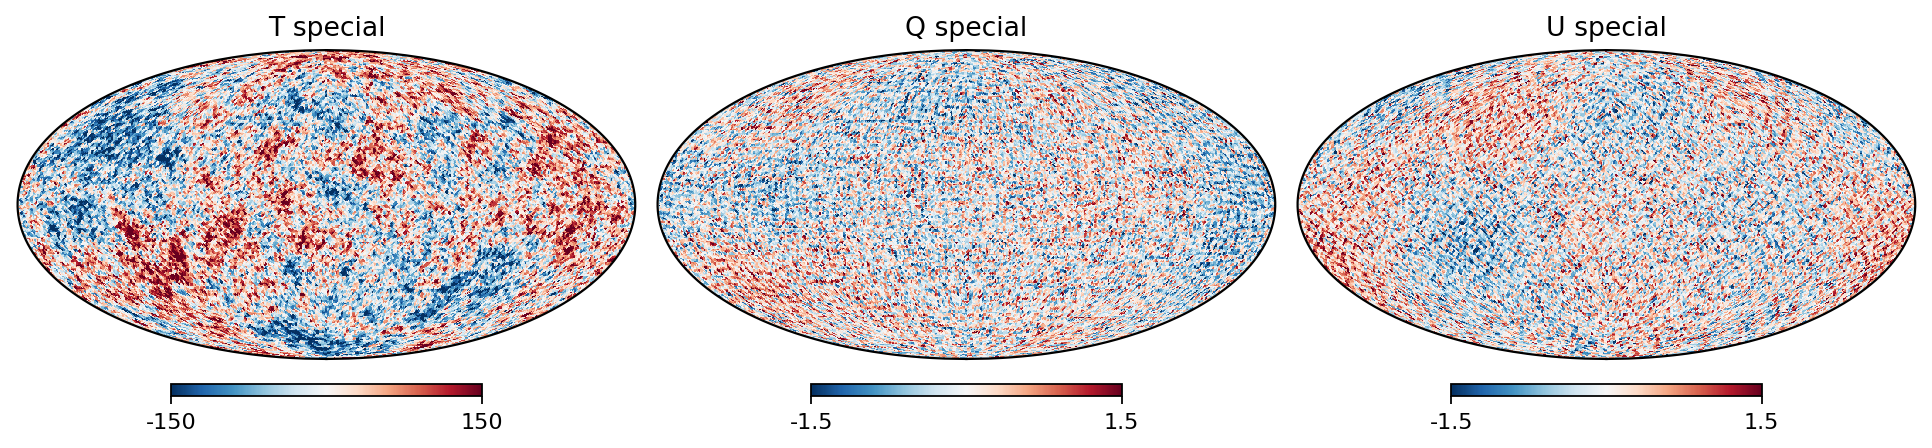

In [9]:
plt.figure(figsize=(12, 3), dpi=80)
hp.mollview(special_cmb[0], cmap='RdBu_r', min=-150, max=150, sub=131, title='T special')
hp.mollview(special_cmb[1], cmap='RdBu_r', min=-1.5, max=1.5, sub=132, title='Q special')
hp.mollview(special_cmb[2], cmap='RdBu_r', min=-1.5, max=1.5, sub=133, title='U special')
hp.graticule(45, 60, alpha=0., lw=1.5)

In [92]:
### save to fits

fname = '/home/shiur/local/large_scale_anomaly/data/special_cmb.fits'

hp.write_map(fname, 1e-6*special_cmb, coord='G'
             , overwrite=True
             , column_units=['K', 'K', 'K'])

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


In [78]:
from astropy.io import fits
from datetime import datetime

In [95]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                24576 / length of dimension 1                          
NAXIS2  =                   48 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    3 / number of table fields                         
TTYPE1  = 'TEMPERATURE'                                                         
TFORM1  = '1024D   '                                                            
TUNIT1  = 'K       '                                                            
TTYPE2  = 'Q_POLARISATION'                                                      
TFORM2  = '1024D   '        

In [94]:
hdul = fits.open(fname, mode='append')
hdr = hdul[1].header
hdr.set('STOKES', 'IQU')
hdr.set('DATE', datetime.strftime(datetime.now(),'%Y-%m-%dT%H:%M:%S')
        , comment='file creation date (YYYY-MM-DDThh:mm:ss UT)')
hdul.writeto(fname, overwrite=True)

In [46]:
cl_ana = hp.anafast(special_cmb)

# Check S12

In [50]:
S12_old = anod.get_S12_aps(cl_ana[0], lmin=2, lmax=10, mode='TT')

S12 = ano.calc_S12_aps(cl_ana[0], lmin=2, lmax=10, mode='TT')

In [51]:
S12_old

49370.71040580267

In [52]:
S12

49370.71040580267

In [ ]:
# Works!

# Check L23

In [14]:
# huh this is really taking a long time!
alm_in1 = hp.map2alm(special_cmb)
L23TT_old = anod.calc_L23TT(alm_in1[0], alm_in1[0], nside=64)

In [16]:
L23TT_old.shape

(49152,)

In [20]:
L23TT_old.max()

0.7862749180696871

In [45]:
np.argmax(L23TT_old)

13459

In [42]:
L23, ipix = ano.find_max_L23_ipix(alm_in1[0], nside=64)

In [43]:
L23

0.7862749180696871

In [44]:
ipix

13459

In [ ]:
# Works!

# Check pp

In [56]:
R_old = anod.get_R(cl_ana[0], lmin=2, lmax=30)

R_new = ano.calc_R(cl_ana[0], lmin=2, lmax=30)

In [57]:
assert R_old==R_new

In [58]:
D_old = anod.get_D(cl_ana[1], lmin=3, lmax=30)

D_new = ano.calc_D(cl_ana[1], lmin=3, lmax=30)

In [59]:
assert D_old==D_new

In [ ]:
# Works!

# Check LVM

In [64]:
npix = hp.nside2npix(nside)
mask = np.zeros(npix)
lvm_old = anod.make_lvm(special_cmb, mask, )
lvm_new = ano.calc_lvm(special_cmb, mask, )

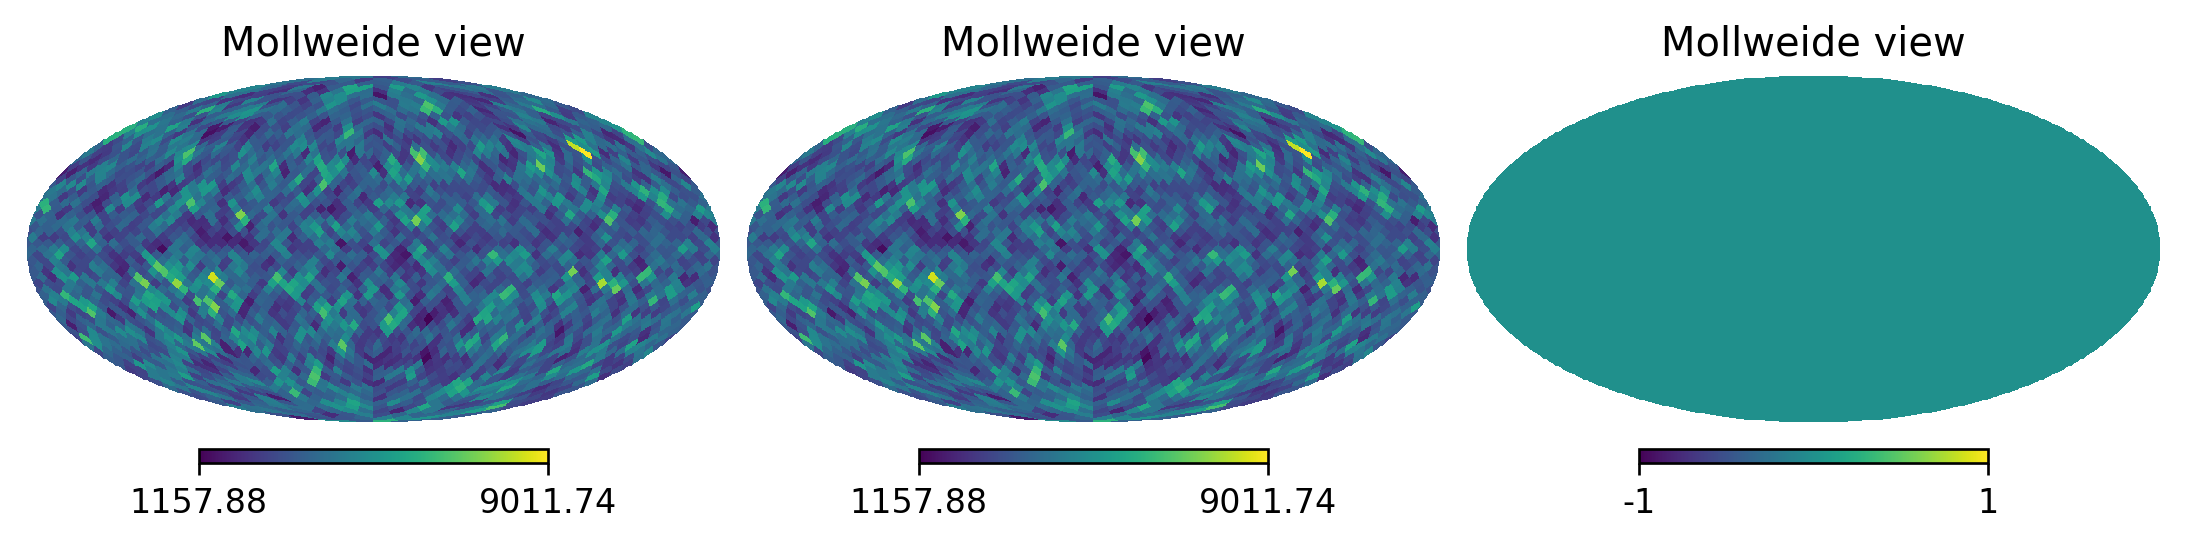

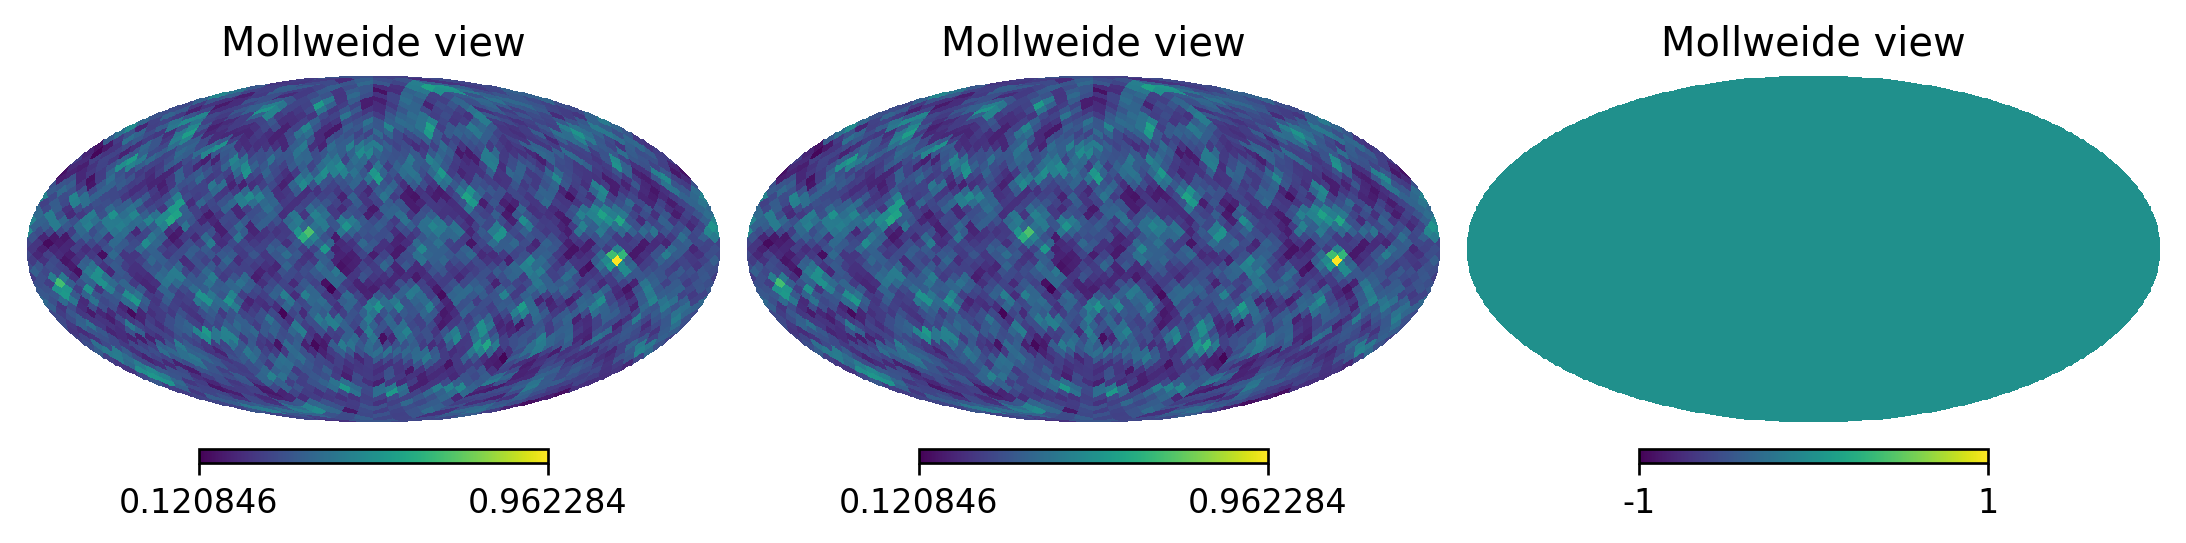

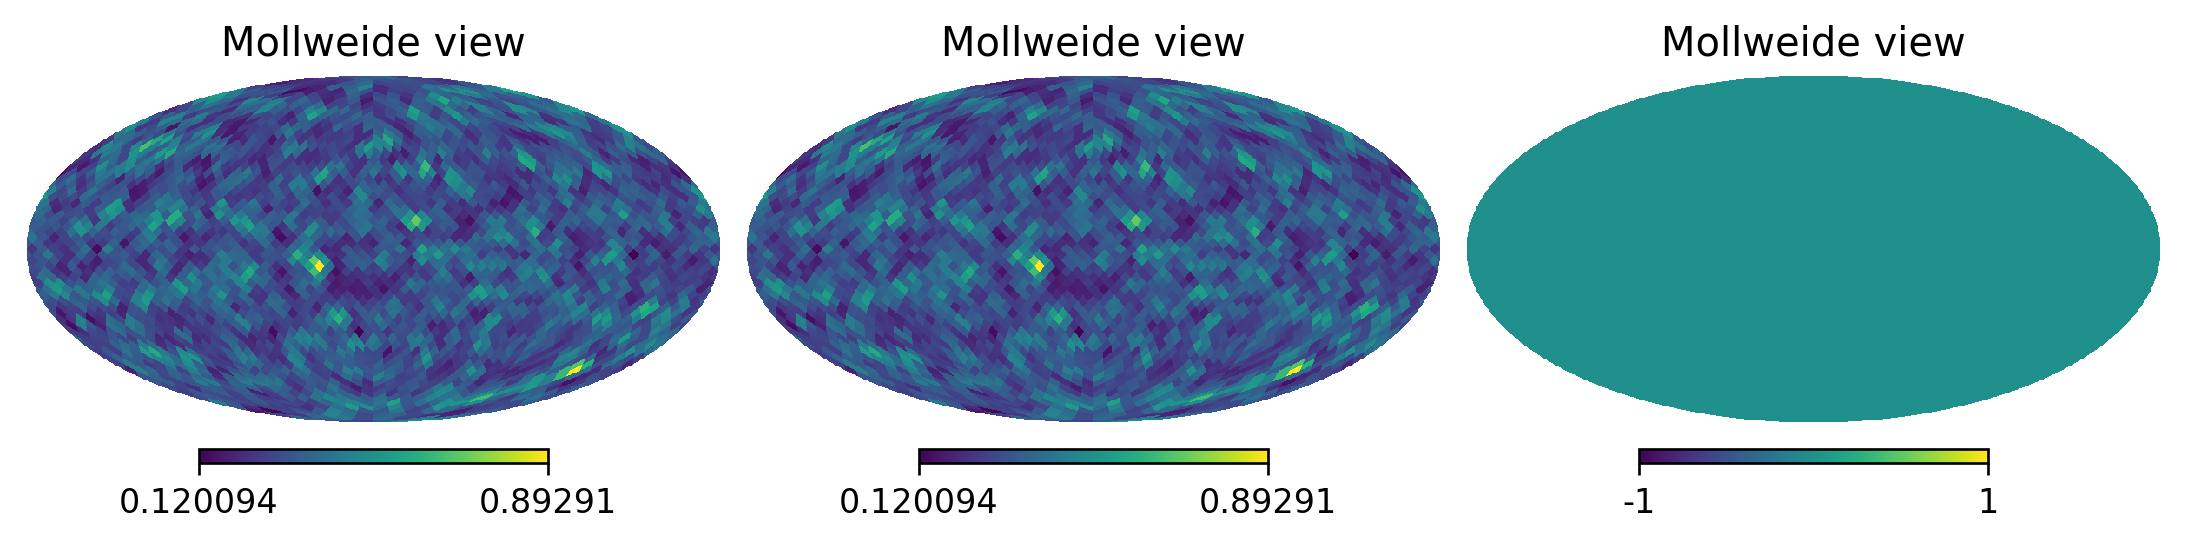

In [67]:
plt.figure(figsize=(9, 2), dpi=120)
hp.mollview(lvm_old[0], sub=131)
hp.mollview(lvm_new[0], sub=132)
hp.mollview(lvm_old[0]-lvm_new[0], sub=133)

plt.figure(figsize=(9, 2), dpi=120)
hp.mollview(lvm_old[1], sub=131)
hp.mollview(lvm_new[1], sub=132)
hp.mollview(lvm_old[1]-lvm_new[1], sub=133)

plt.figure(figsize=(9, 2), dpi=120)
hp.mollview(lvm_old[2], sub=131)
hp.mollview(lvm_new[2], sub=132)
hp.mollview(lvm_old[2]-lvm_new[2], sub=133)

In [ ]:
# Also works!

In [73]:
bias = np.zeros_like(lvm_old[0])
varlvm = np.ones_like(lvm_old[0])

anod.fit_lvm_dipole(lvm_old[2], bias, varlvm)

array([ 0.32862032, -0.00373742, -0.00214436, -0.00332778])

In [74]:
ano.fit_lvm_dipole(lvm_new[2])

array([ 0.32862032, -0.00373742, -0.00214436, -0.00332778])

In [ ]:
raise

# Old

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import healpy as hp

import classtools.users.rshi.anomalies as ano

In [3]:
Imat = ano.calc_Imat(0.5, 2, 10)

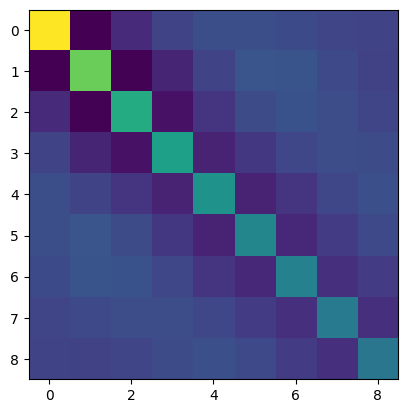

In [8]:
plt.imshow((Imat))

In [20]:
np.random.seed(0)

nside = 1
nell = 3*nside-1
cl = 1./np.arange(2, 2+nell)**2
simap = hp.synfast(cl, nside)

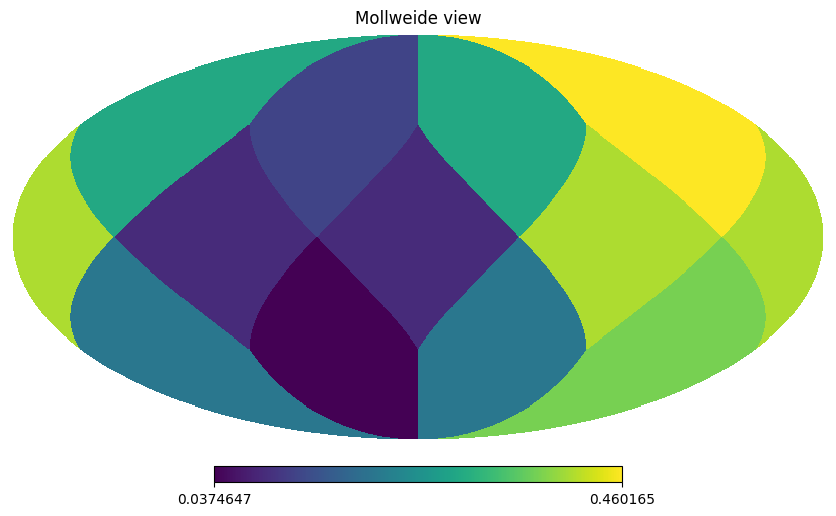

In [21]:
hp.mollview(simap)

In [ ]:
hp.ring2nest()

In [26]:
np.random.seed(10)
arr = np.random.random_integers(300, size=10)
print(arr)
np.argsort(arr)

[266 126  16 124 157 222   9  74 257  41]


/tmp/ipykernel_1709692/3082145624.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 300 + 1) instead
  arr = np.random.random_integers(300, size=10)


array([6, 2, 9, 7, 3, 1, 4, 5, 8, 0])

In [51]:
### Visualize E-mode maps
ll, mm = hp.Alm.getlm(lmax=3*nside-1)

vis_alm = np.zeros_like(special_alm).copy()
vis_alm[:, ll==2] = special_alm[:, ll==2]
quadrupole_map = hp.alm2map(vis_alm, nside=nside, )

vis_alm = np.zeros_like(special_alm).copy()
vis_alm[:, ll==3] = special_alm[:, ll==3]
octupole_map = hp.alm2map(vis_alm, nside=nside, )
qo_map = quadrupole_map + octupole_map

quadrupole_Emap = lsa.convert_Emap_naive(quadrupole_map)
octupole_Emap = lsa.convert_Emap_naive(octupole_map)
qo_Emap = quadrupole_Emap + octupole_Emap

/home/shiur/local/large_scale_anomaly/lsa.py:517: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  Emap = hp.alm2map(almE, nside=nside, verbose=False)


In [35]:
QOang

(array([1.10636251]), array([0.46633016]))

In [50]:
QOang

array([26.71875   , 26.61009781])

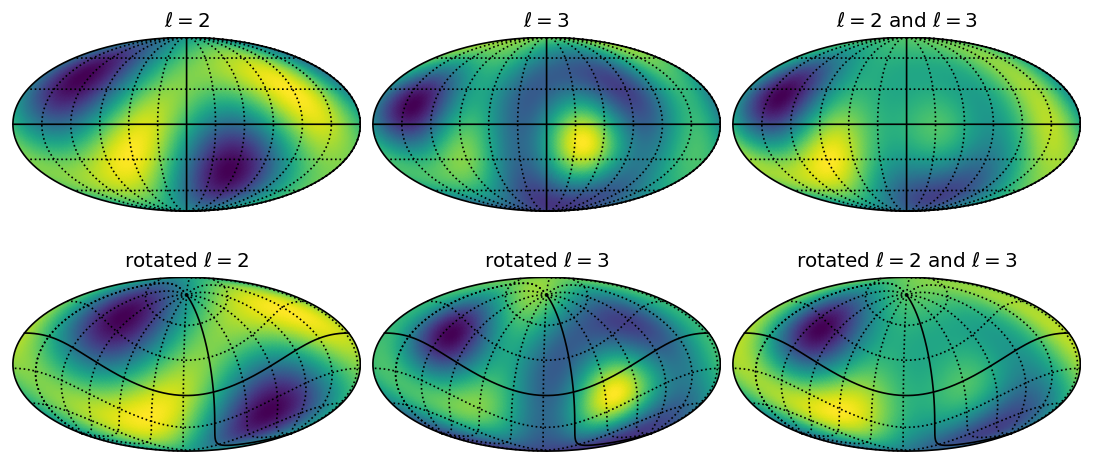

In [58]:
plt.figure(figsize=(9, 4), dpi=120)
hp.mollview(quadrupole_map[0], sub=231, cbar=None, title=r'$\ell=2$')
hp.mollview(octupole_map[0], sub=232, cbar=None, title=r'$\ell=3$')
hp.mollview(qo_map[0], sub=233, cbar=None, title=r'$\ell=2$ and $\ell=3$')

hp.mollview(quadrupole_map[0], sub=234, rot=(QOang[0], QOang[1], 0), cbar=None, title=r'rotated $\ell=2$')
hp.mollview(octupole_map[0], sub=235, rot=(QOang[0], QOang[1], 0), cbar=None, title=r'rotated $\ell=3$')
hp.mollview(qo_map[0], sub=236, rot=(QOang[0], QOang[1], 0), cbar=None, title=r'rotated $\ell=2$ and $\ell=3$')

hp.graticule()

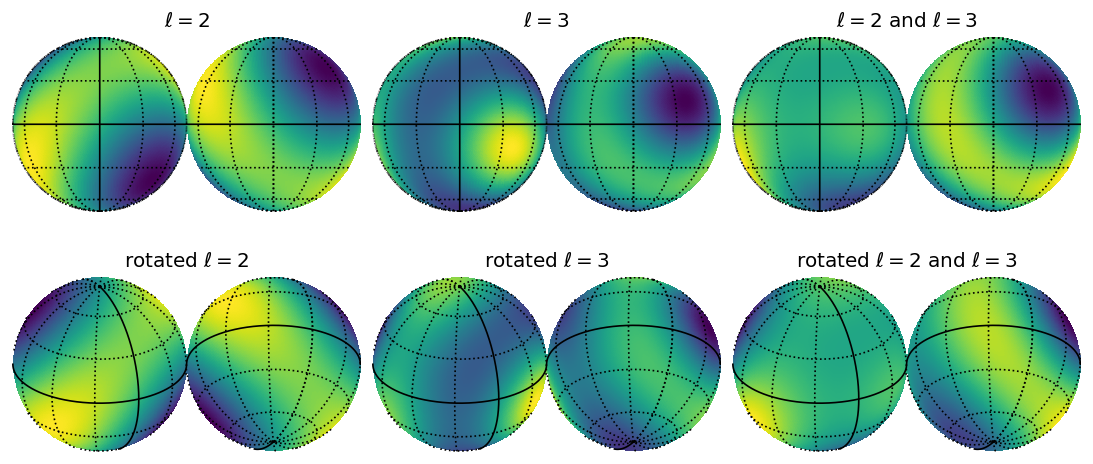

In [57]:
plt.figure(figsize=(9, 4), dpi=120)
hp.orthview(quadrupole_map[0], sub=231, cbar=None, title=r'$\ell=2$')
hp.orthview(octupole_map[0], sub=232, cbar=None, title=r'$\ell=3$')
hp.orthview(qo_map[0], sub=233, cbar=None, title=r'$\ell=2$ and $\ell=3$')

hp.orthview(quadrupole_map[0], sub=234, rot=(QOang[0], QOang[1], 0), cbar=None, title=r'rotated $\ell=2$')
hp.orthview(octupole_map[0], sub=235, rot=(QOang[0], QOang[1], 0), cbar=None, title=r'rotated $\ell=3$')
hp.orthview(qo_map[0], sub=236, rot=(QOang[0], QOang[1], 0), cbar=None, title=r'rotated $\ell=2$ and $\ell=3$')

hp.graticule()

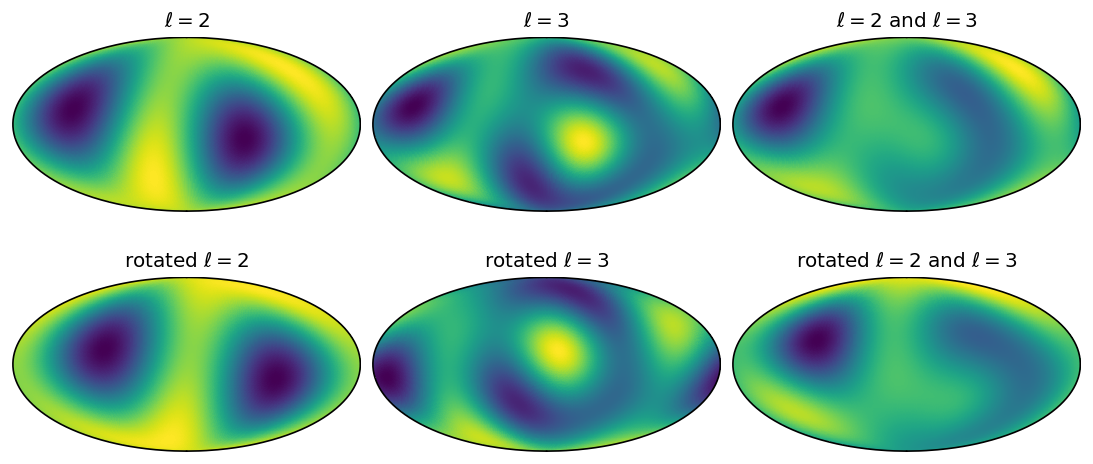

In [53]:
plt.figure(figsize=(9, 4), dpi=120)
hp.mollview(quadrupole_Emap, sub=231, cbar=None, title=r'$\ell=2$')
hp.mollview(octupole_Emap, sub=232, cbar=None, title=r'$\ell=3$')
hp.mollview(qo_Emap, sub=233, cbar=None, title=r'$\ell=2$ and $\ell=3$')

hp.mollview(quadrupole_Emap, sub=234, rot=(QOang[0], QOang[1], 0), cbar=None, title=r'rotated $\ell=2$')
hp.mollview(octupole_Emap, sub=235, rot=(-QOang[0], -QOang[1], 0), cbar=None, title=r'rotated $\ell=3$')
hp.mollview(qo_Emap, sub=236, rot=(QOang[0], QOang[1], 0), cbar=None, title=r'rotated $\ell=2$ and $\ell=3$')

hp.graticule(alpha=0)